In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #validação cruzada
import matplotlib.pyplot as plt # biblioteca para "plotar" os diagramas de mse e acurácia

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gimn0/ia_car_evaluation/main/data/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'])
df

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.buying.replace( ('vhigh','high','med','low'), (1, 2, 3, 4), inplace= True )
df.maint.replace( ('vhigh','high','med','low'), (1, 2, 3, 4), inplace= True )
df.doors.replace( ('2','3','4','5more'), (1, 2, 3, 4), inplace= True )
df.persons.replace( ('2','4','more'), (1, 2, 3), inplace= True )
df.lug_boot.replace( ('small','med','big'), (1, 2, 3), inplace= True )
df.safety.replace( ('low','med','high'), (1, 2, 3), inplace= True )
df.target.replace( ('unacc','acc','good','vgood'), (1, 2, 3, 4), inplace= True )

data = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
target = df.target

df

,buying,maint,doors,persons,lug_boot,safety,target
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,3
1724,4,4,4,3,2,3,4
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,3


In [ ]:
target = pd.get_dummies(target).values

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(data, target, train_size = 0.66, random_state = 30) # validação cruzada holdout

In [ ]:
learning_rate = 0.2 # valor usado na atualização dos pesos
iterations = 4000

input_size = 6 # entradas (buying, maint, doors, persons, lug_boot, safety)
hidden_size = 1 # camada oculta
output_size = 4 # saídas (unacc, acc, good, vgood)

results = pd.DataFrame( columns= ["mse", "accuracy"] ) # dataframe para armazenar o erro quadrático médio e a acurácia de cada iteração

In [ ]:
# inicialização dos pesos
np.random.seed(15)

W1 = np.random.normal(scale= 0.5, size= (input_size, hidden_size))
W2 = np.random.normal(scale= 0.5, size= (hidden_size, output_size))

In [ ]:
def sigmoid(x): # função de ativação sigmoid
    return 1 / ( 1 + np.exp( -x ) )

def mean_squared_error( target_pred, target_true ): # erro quadrático médio
    return ( ( target_pred - target_true ) ** 2 ).sum() / ( 2 * target_pred.size )

def accuracy( target_pred, target_true ): # acurácia
    acc = target_pred.argmax( axis = 1 ) == target_true.argmax( axis = 1 )
    return acc.mean()

In [ ]:
for i in range(iterations):
    # feedfoward
    Z1 = np.dot( data_train, W1 )
    A1 = sigmoid( Z1 )
    
    Z2 = np.dot( A1, W2 )
    A2 = sigmoid( Z2 ) # predição
    
    mse = mean_squared_error( A2, target_train )
    acc = accuracy( A2, target_train )
    results = results.append( {"mse":mse, "accuracy":acc}, ignore_index=True ) # armazena o atual mse e acurácia em results
    
    # backpropagation
    E1 = A2 - target_train
    dW1 = E1 * A2 * ( 1 - A2 )
    
    E2 = np.dot( dW1, W2.T )
    dW2 = E2 * A1 * ( 1 - A1 )
    
    # atualização dos pesos
    W2_update = np.dot( A1.T, dW1 )
    W1_update = np.dot( data_train.T, dW2 )
    
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

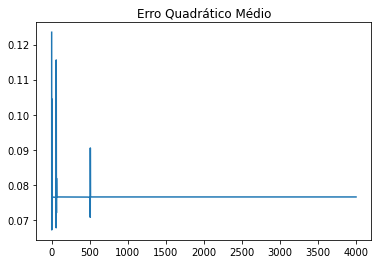

In [ ]:
results.mse.plot(title= "Erro Quadrático Médio")

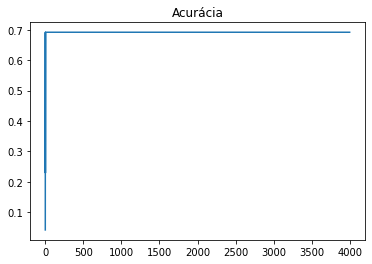

In [ ]:
results.accuracy.plot( title= "Acurácia" )

In [ ]:
# bloco de código para escrever o valor final de mse e acurácia dos dois diagramas que foram "plotados" acima
Z1 = np.dot( data_test, W1 )
A1 = sigmoid( Z1 )

Z2 = np.dot( A1, W2 )
A2 = sigmoid( Z2 )

mse = mean_squared_error( A2, target_test )
acc = accuracy( A2, target_test )

print( "MSE: %.3f"% mse )
print( "Acurácia: %.3f"% acc )

MSE: 0.071
Acurácia: 0.716
